# Assignment 6

## Generating values according to a probability distribution 

In this part of the assignment you will create a function to generate values of $x$ between 0 and 10 distributed according to 

$$ \frac{1}{\mathcal{N}} \left( 1 + \frac{2}{1+x^2}+ \sin(\sqrt{3 x})^2\right) $$

with 

$$ \mathcal{N} = \int\limits_0^{10} f(x) dx \;.$$

Let's first import the usual suspects:

In [1]:
import matplotlib.pyplot as plt
import numpy
import random

This defines the function:

In [2]:
norm = (181 + 24*numpy.arctan(10)-numpy.cos(2*numpy.sqrt(30))-2*numpy.sqrt(30)*numpy.sin(2*numpy.sqrt(30)))/12

def f(x):
    return  (1 + (2/(1+x**2)+ numpy.sin(numpy.sqrt(3*x))**2))/norm

This plots the function:

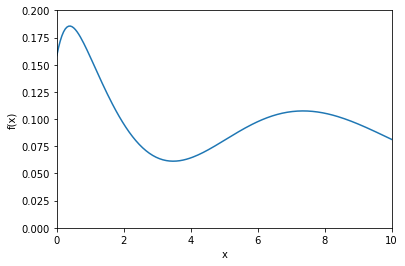

In [3]:
xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs);
plt.ylabel('f(x)')
plt.xlabel('x')
plt.xlim(0,10)
plt.ylim(0,0.2);

Define a function `genSample` that generates a sample of `npts` values $x$ distributed according to $f(x)$. [5 marks]


In [4]:
def genSample(npts):
    sample = []
    # YOUR CODE HERE
    top = 0.2 
    
    while len(sample) < npts:
        x = random.random() * 10
        
        #print(x)
        test = random.random() * top
        
        #print(test)
        if test <= f(x):
            sample.append(x)

    return numpy.array(sample)





In [5]:
# this test is worth 1 mark
testSample = genSample(103)
assert (testSample >= 0).all() 
assert (testSample <= 10).all()
assert len(testSample) == 103

## Plotting task

Make a plot to show that the values generated are distributed in the right manner. The plot should have a title and axis labels. [4 marks]


/opt/conda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


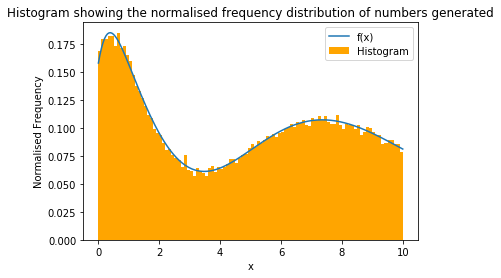

In [8]:
n_points = 100000
sample = genSample(n_points)
#print(len(sample))

bin_num = int(n_points/1000)


xs = numpy.linspace(0, 10, 200)
fs = f(xs)
plt.plot(xs, fs)
plt.hist(sample,bin_num, color = "orange", normed = True)
plt.legend(["f(x)","Histogram"])


plt.title("Histogram showing the normalised frequency distribution of numbers generated")
plt.xlabel("x")
plt.ylabel("Normalised Frequency")
plt.show()